# Univariate linear regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt                # To create plots
import numpy as np                             # To perform calculations quickly
import pandas as pd                            # To load in and manipulate data
from sklearn import linear_model               # Linear models
from ipywidgets import interact                # For interactive execution of code

In [3]:
# Load in the data
data = pd.read_csv("data/bloodpressure.csv")

## Exploring the dataset

### Features:

* Age
* Weight
* Blood pressure

In [4]:
# See the shape of the data (rows and columns)
data.shape

(11, 3)

In [5]:
# View the first 5 lines
data.head()

,age,weight,blood_pressure
0,52,78,136
1,59,83,143
2,67,88,153
3,73,96,162
4,64,89,161


In [6]:
# View statistics of the dataset (per column)
data.describe()

,age,weight,blood_pressure
count,11.000000,11.000000,11.000000
mean,62.454545,88.636364,151.636364
std,9.114424,8.417514,14.087390
min,46.000000,76.000000,128.000000
25%,56.500000,84.000000,140.000000
50%,64.000000,88.000000,153.000000
75%,69.500000,95.000000,162.000000
max,74.000000,103.000000,171.000000


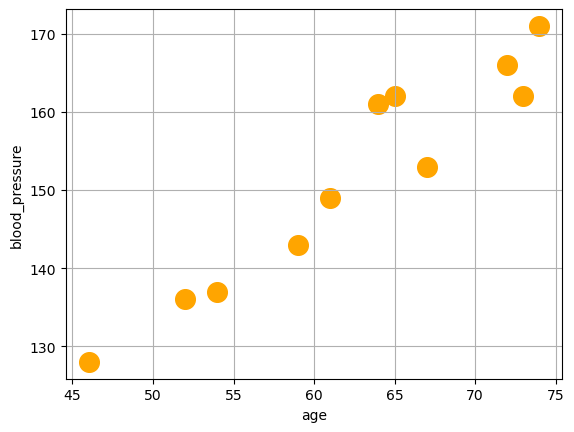

In [7]:
# Plot the data age <-> blood pressure
data.plot(x="age",y="blood_pressure",kind="scatter",grid=True,s=200,color='orange');

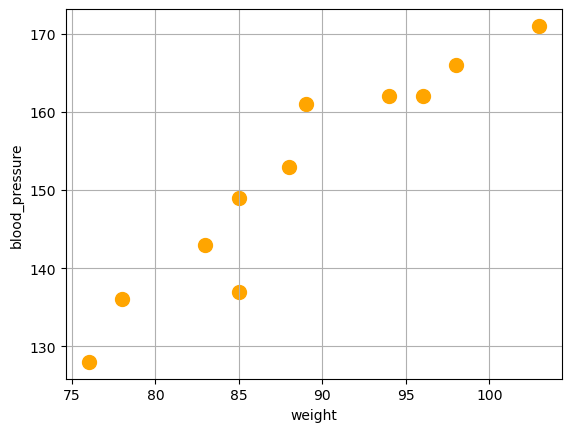

In [8]:
# Plot the data weight <-> blood pressure
data.plot(x="weight",y="blood_pressure",kind="scatter",grid=True,s=100,color='orange');

## Manually finding a trendline

In mathematics:
y = ax+b
- a = slope
- b = interception with the y-axis

In machine learning:
y = theta1*x+theta2

In [9]:
# Find a trendline for age <-> blood_pressure
##  Let's use minimum and maximum age to determine a trend line
min_bp=data[data.age==data.age.min()]
max_bp=data[data.age==data.age.max()]

# Display minimum and maximum age
display(min_bp)
display(max_bp)

# Calculate slope
## slope = (y2-y1)/(x2-x1)
y2=max_bp.blood_pressure.values[0]
y1=min_bp.blood_pressure.values[0]

x2=max_bp.age.values[0]
x1=min_bp.age.values[0]
slope = (y2-y1)/(x2-x1)
print(f"Slope: {slope}")

# Calculate intercept
## intercept = y-ax
intercept = max_bp.blood_pressure.values[0]-slope*max_bp.age.values[0]
print(f"Intercept: {intercept}")

# Calculate x and y for each age
ages=data.age
blood_pressures = slope*ages+intercept

blood_pressures2 = slope*np.array(range(-2,75))+intercept


,age,weight,blood_pressure
9,46,76,128


,age,weight,blood_pressure
5,74,103,171


Slope: 1.5357142857142858
Intercept: 57.35714285714285


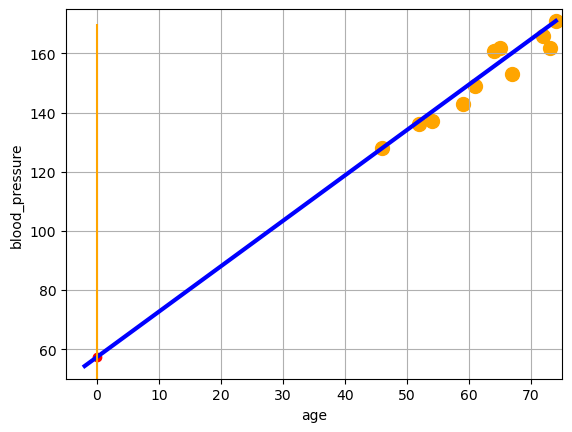

In [10]:
data.plot(kind='scatter',x='age',y='blood_pressure',grid=True,s=100,color='orange',xlim=(-5,75),ylim=(50,175))
plt.plot(list(range(-2,75)),blood_pressures2, color='blue',linewidth=3)
plt.vlines(x=0,ymin=0,ymax=170,colors="orange")
plt.scatter(x=0,y=57.357,c="red",)

### Discussion
This is not the best line. We only take 2 points into consideration. Most of the points are below our trendline.

To find the best trendline we need to take the slope and intercept paramaters that result in the sum of the lowest errors.

We do this using the cost function "Least Mean Squares" (LMS) method

* $m$ = the number of values
* $h\theta(x^{(i)})$: the hypotheses value (=y_pred) based on the trend line
* $y^{(i)}$: the actual value (=y_test) from the dataset

$J(\theta) = \frac{1}{2m}\sum \limits _{i=1} ^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2} $


In [11]:
def LMS(y_pred,y_test):
    if len(y_pred)!=len(y_test):
        assert False, "y_pred and y_test should have the same length!"
    return (1/(2*len(y_pred)))*sum((y_pred-y_test)**2)

In [12]:
LMS(blood_pressures,data.blood_pressure)

9.318239795918373

The trendline we constructed has a LMS value of 9.31, let's now try to construct the trendline a bit lower (reduce intercept)

7.993564471243041

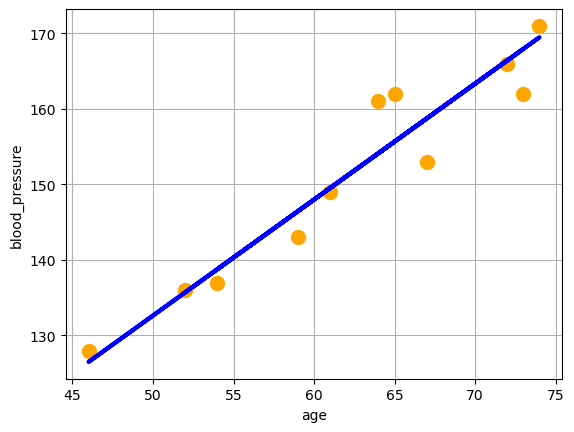

In [13]:
# Lower the intercept by 1.5
intercept2 = intercept-1.5
# Calculate the new blood pressure values based on new interception
blood_pressures2 = slope*ages+intercept2

# Plot the new trendline
data.plot(kind='scatter',x='age',y='blood_pressure',grid=True,s=100,color='orange')
plt.plot(ages,blood_pressures2, color='blue',linewidth=3)

#Calculate the new error
LMS(blood_pressures2,data.blood_pressure)

As you can see, the LMS has reduced with aproximately 1.3!

Besides adjusting the intercept, you can also adjust the slope.

This tweaking is done using **Gradient Descent** (GDS)

In [14]:
# Interactive example to change the slope and the intercept. See the LMS and plot updated in real time

@interact(slope=(1,2,0.01),intercept=(55,60,0.5))
def test(slope=1.5,intercept=57):
    # Calculate the new blood pressure values based on new interception
    blood_pressures = slope*ages+intercept

    # Plot the new trendline
    data.plot(kind='scatter',x='age',y='blood_pressure',grid=True,s=100,color='orange')
    plt.plot(ages,blood_pressures, color='blue',linewidth=3)

    #Calculate the new error
    print(f"LMS: {LMS(blood_pressures,data.blood_pressure)}")

interactive(children=(FloatSlider(value=1.5, description='slope', max=2.0, min=1.0, step=0.01), FloatSlider(va…

## Gradient Descent (GDS)

General formula for LMS:
$J(\theta_0,\theta_1) = \frac{1}{2m}\sum \limits _{i=1} ^{m}(({\theta_1}x^{(i)}+\theta_0)-y^{(i)})^{2} $

Adjust $\theta_0$ and $\theta_1$ until you find the values that give you the minimal value for LMS

As a test, let's first test 1000 values between 1 and 2 for theta1 with a fixed theta0

In [15]:
def general_LMS(theta0,theta1,data,x,y):
    return (1/(2*len(data)))*sum(((theta1*data[x]+theta0)-data[y])**2)

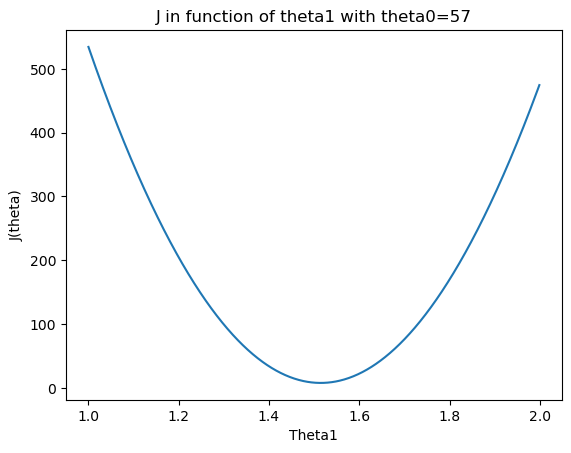

Minimum theta1: 1.515
Minimum LMS: 7.908901136363644


In [16]:
# Keep theta0 fixed at 57, adjust theta1
theta1s=[]
LMSvalues=[]
for x in range(1000):
    #Test a 1000 values between 1 and 2
    theta1=round((1/1000)*x+1,3)
    theta1s.append(theta1)
    LMSvalues.append(general_LMS(theta0=57,theta1=theta1,data=data,x="age",y="blood_pressure"))
    
#print(LMSvalues)
plt.plot(theta1s,LMSvalues)
plt.ylabel("J(theta)")
plt.xlabel("Theta1")
plt.title("J in function of theta1 with theta0=57")
plt.show()

mintheta1=theta1s[LMSvalues.index(min(LMSvalues))]
print(f"Minimum theta1: {mintheta1}\nMinimum LMS: {min(LMSvalues)}")

The theta1 with a minimum LMS for a fixed theta0 at 57 is 1.515

This already took 1000 calculations with this step size. If we wanted to also variate the theta0 1000 times, we would need to do 1000*1000 calculations!

That is too expensive for bigger datasets! Let's try it for a 100 by 100 range for this data.

In [17]:
from time import time
start=time()
# Adjust both theta0 and theta1
theta0s=[]
theta1s=[]
LMSvalues=[]
for y in range(100):
    # Test 100 values between -43 and 157
    theta0=round((200/100)*y-43,3)
    for x in range(100):
        # Test a 100 values between 0 and 3
        theta1=round((3/100)*x,3)
        # Add the theta values to a list
        theta0s.append(theta0)
        theta1s.append(theta1)
        # Add the LMS values to a list
        LMSvalues.append(general_LMS(theta0=theta0,theta1=theta1,data=data,x="age",y="blood_pressure"))

print(f"Finished, it took {time()-start} seconds")

Finished, it took 1.8275468349456787 seconds


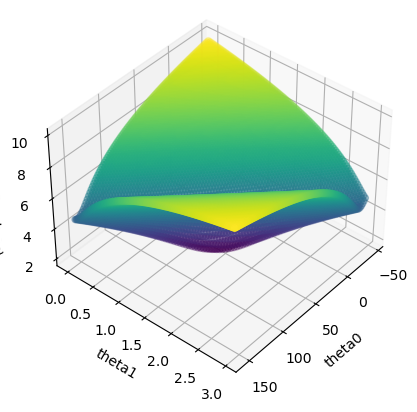

In [68]:
# Convert LMS to log(LMS)
logvals=[np.log(x) for x in LMSvalues]

# Plot the log(LMS) vs theta0 and theta1
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(theta0s,theta1s,logvals,c=logvals)
ax.view_init(40, 40)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('log(LMS-values)')
plt.show()

Instead of trying every possible combination of slope and intercept:
use the gradients of the LMS for both thetas!
***
Gradients are calculated using the derivatives for each theta from the main LMS function.

* gradient for $\theta_0: \frac{dJ(\theta)}{d\theta_0} = \frac{1}{m}\sum\limits_{i=1}^{m}((\theta_{1}x^{(i)}+\theta_{0})-y^{(i)})$
* gradient for $\theta_1: \frac{dJ(\theta)}{d\theta_1} = \frac{1}{m}\sum\limits_{i=1}^{m}((\theta_{1}x^{(i)}+\theta_{0})-y^{(i)})x^{(i)}$

Update $\theta_0$ and $\theta_1$:

* $\theta_0=\theta_0-\mu\frac{dJ(\theta)}{d\theta_0}$

* $\theta_1=\theta_1-\mu\frac{dJ(\theta)}{d\theta_1}$

Where $\mu$ = the learning rate

Update the thetas untill the values converge

***

However, instead of iterating, we can simplify this as:

$y=mx+b$

with m = $\frac{\sum\limits_{i=1}^m((x_i-\bar{x})(y_i-\bar{y}))}{\sum\limits_{i=1}^m(x_i-\bar{x})^2}$

and b = $\bar{y}-m\bar{x}$

Minimal LMS: 7.853643128593885
Slope: 1.476800175093018
Intercept: 59.403479973736054


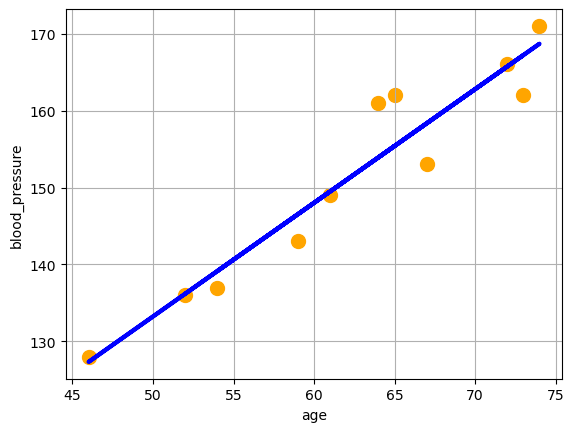

In [18]:
# All x and y values
X=data["age"]
y=data["blood_pressure"]

# Averages of x and y
Xavg=sum(X)/len(X)
yavg=sum(y)/len(y)

# Optimal slope
m=sum((X-Xavg)*(y-yavg))/sum((X-Xavg)**2)
# Optimal intercept
b=yavg-m*Xavg

# Calculate the new blood pressure values based on new interception
blood_pressures3 = m*X+b

# Plot the new trendline
data.plot(kind='scatter',x='age',y='blood_pressure',grid=True,s=100,color='orange')
plt.plot(X,blood_pressures3, color='blue',linewidth=3)

#Calculate the new error
print(f"Minimal LMS: {LMS(blood_pressures3,data.blood_pressure)}")
print(f"Slope: {m}")
print(f"Intercept: {b}")

In [19]:
# Predict the blood pressure of a person thats 70  years old
m*70+b

162.7794922302473

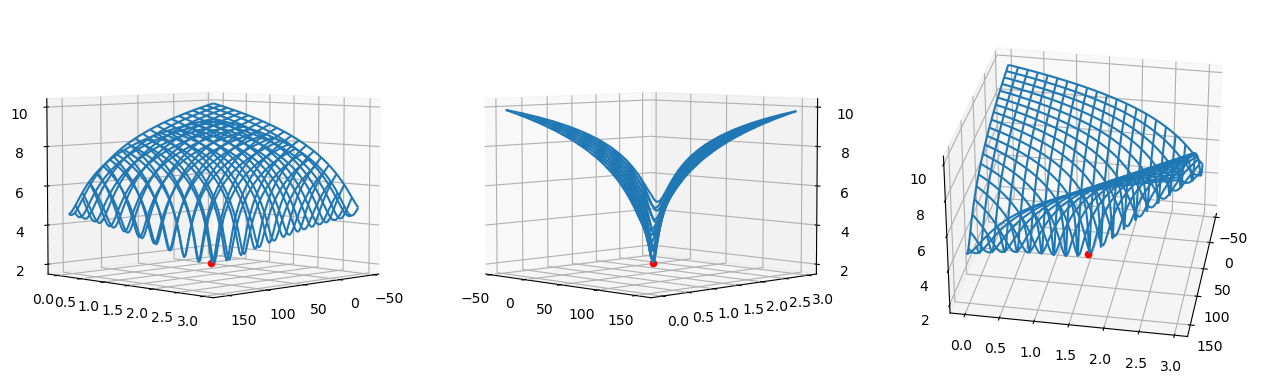

In [21]:
%matplotlib inline
# Convert LMS to log(LMS)
logvals=[np.log(x) for x in LMSvalues]

# Plot 1
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1,3,1,projection='3d')
ax.plot_wireframe(np.array(theta0s).reshape(100,100),
                  np.array(theta1s).reshape(100,100),
                  np.array(logvals).reshape(100,100), 
                  rstride=5, cstride=5)
ax.scatter3D(b,m,np.log(7.853643128593885),c='red')
ax.view_init(5, 45)

# Plot 2
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_wireframe(np.array(theta0s).reshape(100,100),
                  np.array(theta1s).reshape(100,100),
                  np.array(logvals).reshape(100,100), 
                  rstride=10, cstride=10)
ax.scatter3D(b,m,np.log(7.853643128593885),c='red')
ax.view_init(5, -45)

# Plot 3
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_wireframe(np.array(theta0s).reshape(100,100),
                  np.array(theta1s).reshape(100,100),
                  np.array(logvals).reshape(100,100), 
                  rstride=5, cstride=5)
ax.scatter3D(b,m,np.log(7.853643128593885),c='red')
ax.view_init(30, 10)

## Linear regression using sklearn

Normal shape:
[52 59 67 73 64 74 54 61 65 46 72]
Reshaped:
[[52]
 [59]
 [67]
 [73]
 [64]
 [74]
 [54]
 [61]
 [65]
 [46]
 [72]]

Slope: [[1.47680018]]
Intercept: [59.40347997]


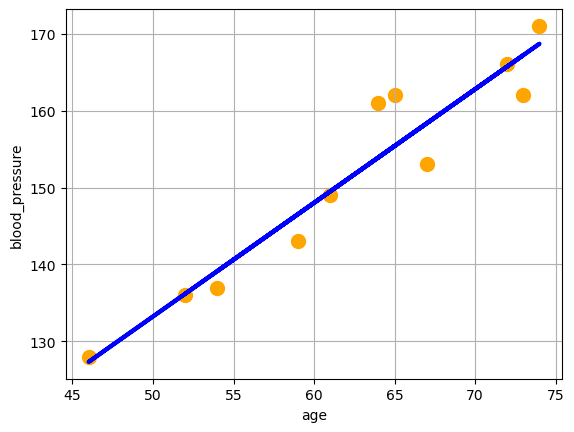

In [22]:
# Split up the data in X (features) and y (targets)
X=data.age.values
y=data.blood_pressure.values
# Now data is in 1 row ([1,2,3,4]) but needed in a colum => reshape aka seperate lists
print(f"Normal shape:\n{X}")
X_reshaped = X.reshape(-1,1)
print(f"Reshaped:\n{X_reshaped}")
y_reshaped = y.reshape(-1,1)

# Construct a linear model from sklearn 
linear_regression_model=linear_model.LinearRegression()

# Fit our data to the model
linear_regression_model.fit(X_reshaped,y_reshaped)

# Plot the data points
data.plot(kind='scatter',x='age',y='blood_pressure',s=100,grid=True,color='orange')

# Plot the constructed line from the regression model
plt.plot(X_reshaped,linear_regression_model.predict(X_reshaped), color='blue',linewidth=3)

# Print the slope and intercept
print()
print(f"Slope: {linear_regression_model.coef_}")
print(f"Intercept: {linear_regression_model.intercept_}")

In [79]:
dir(linear_regression_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [23]:
# Predict the blood pressure of a person that's 70  years old
linear_regression_model.predict([[70]])
# or
linear_regression_model.predict(np.array(70).reshape(-1,1))
# or
linear_regression_model.coef_*70+linear_regression_model.intercept_

array([[162.77949223]])

## Exercise
Adjust the sklearn implementation from above to predict the blood pressure from a person that weighs 85kg.

Normal shape:
[ 78  83  88  96  89 103  85  85  94  76  98]
Reshaped:
[[ 78]
 [ 83]
 [ 88]
 [ 96]
 [ 89]
 [103]
 [ 85]
 [ 85]
 [ 94]
 [ 76]
 [ 98]]

Slope: [[1.58570695]]
Intercept: [11.08506543]


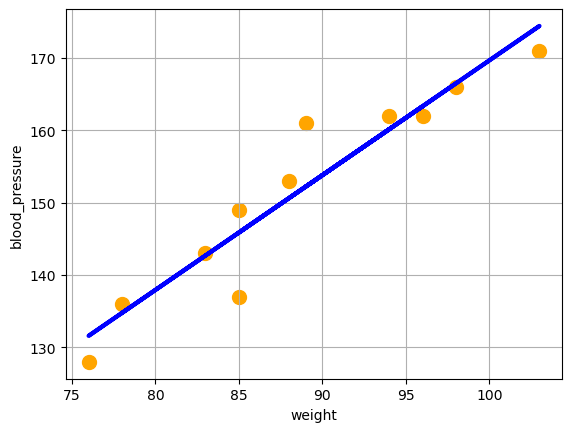

In [24]:
X = data.weight.values
y = data.blood_pressure.values

# Now data is in 1 row ([1,2,3,4]) but needed in a colum => reshape aka seperate lists
print(f"Normal shape:\n{X}")
X_reshaped = X.reshape(-1,1)
print(f"Reshaped:\n{X_reshaped}")
y_reshaped = y.reshape(-1,1)

# Construct a linear model from sklearn 
linear_regression_model=linear_model.LinearRegression()

# Fit our data to the model
linear_regression_model.fit(X_reshaped,y_reshaped)

# Plot the data points
data.plot(kind='scatter',x='weight',y='blood_pressure',s=100,grid=True,color='orange')

# Plot the constructed line from the regression model
plt.plot(X_reshaped,linear_regression_model.predict(X_reshaped), color='blue',linewidth=3)

# Print the slope and intercept
print()
print(f"Slope: {linear_regression_model.coef_}")
print(f"Intercept: {linear_regression_model.intercept_}")

In [25]:
# Predict the blood pressure of a person that's 70  years old
linear_regression_model.predict([[85]])
# or
linear_regression_model.predict(np.array(85).reshape(-1,1))
# or
linear_regression_model.coef_*85+linear_regression_model.intercept_

array([[145.87015653]])